<img style="float:right" width="400" src="http://static1.squarespace.com/static/5a4e740c4c326d723144bf21/t/5a4ebe39ec212d389156642c/1515109949850/Group%402x.png?format=1500w">

# 2. IGN Ratings Project
For our first project we'll do analysis on video game ratings.

You've recently decided to create your very own video game! As an avid reader of IGN Game Reviews, you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (Disaster) to 10 (Masterpiece).

## Getting started

When doing data analysis we will often have a question in mind that we want to answer.  In this case, we want to know what gaming platform is the best one for your preferred game genre.

To get started, create a new notebook, and add a markup block to the top to give the note book a title, some background, the questions you have, and perhaps an image to illustrate the problem.

> This project is based on an exersize in the [Kaggle Data Visualization course](https://www.kaggle.com/learn/data-visualization).


# Set up

To make it easier to write code, we'll import and configure the libraries we want to use at the top of our notebook.  We can use the same code up front in all of our notebooks, or import what we need as we go.

In [2]:
%matplotlib inline
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup Complete")

Setup Complete


Lets look at this code block more carefully.

`%matplotlib inline` chooses the plotting 'engine' or 'backend' for drawing plots in Jupyter notebooks.  This may not be set to the default in some python environments so we set it here.  The `%` indicates it is a 'magic function' that is called by the Jupyter notebook environment.

Next, we import the **pandas** library into our notebook so we can use them in our code.  Pandas is the key library we use for file input and output and data processing.  Much of this course will be about becoming familiar with using Python with Pandas.

The second is a line recommended to avoid [a warning](https://stackoverflow.com/questions/61443261/what-is-the-use-of-pd-plotting-register-matplotlib-converters-in-pandas)

We then import the matplot visualization library and reference it as `plt`, and the seaborn library as `sns`.

# Accessing Data

Before we can do anything, we need data for analysis and make it accessible by our notebook.

For the projects we're working on in this course, we've made most of the data sets available in a github repository.  You can either download them from there and upload them to your notebook environment, or clone the repository in your environment.

** ensure datasets are in a directory accessible by the notebook, either by uploading to Google Drive, or by cloning the dataset in the repository using: **

```
!git clone https://github.com/mblackstock/datasets.git
```

The datasets are now available in the directory `datasets`.

In [3]:
# Do this once if the dataset is not available yet
# !git clone https://github.com/mblackstock/datasets.git

## Ensuring data is accessible

Now that the data is available, let's use a terminal command to make sure our data is accessible by Python and our notebook.

In [4]:
!head -n 5 datasets/ign/ign_scores.csv

Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Dreamcast,6.8828571428571435,7.51111111111111,6.281818181818181,8.2,8.34,8.088888888888889,7.7,7.0424999999999995,7.616666666666668,7.628571428571428,7.272222222222222,6.433333333333333
Game Boy Advance,6.373076923076922,7.507692307692309,6.057142857142857,6.226315789473684,6.970588235294118,6.5321428571428575,7.542857142857143,6.6571428571428575,6.444444444444445,6.928571428571429,6.694444444444444,7.175000000000001
Game Boy Color,6.2727272727272725,8.166666666666666,5.3076923076923075,4.5,6.352941176470588,6.583333333333333,7.285714285714286,5.897435897435898,4.5,5.9,5.790697674418604,7.4
GameCube,6.5325842696629195,7.608333333333334,6.753846153846154,7.422222222222222,6.665714285714286,6.133333333333333,7.890909090909091,6.85263157894737,6.981818181818183,8.028571428571428,7.4813186813186805,7.116666666666667


## Terminal commands in Jupyter

We can terminal commands from Jupyter notebooks by prepending an exclamation point or bang (!).  Here we ran the `head` command to see the beginning of the csv file to make sure it is where we expect it.

This is a quick way of viewing the 'raw' data before we try to load it using python.

In addition to using terminal commands, we can use *magic commands* supported by the underlying python environment by prepending percent (%).  For example, to see the current working directory:

In [5]:
%pwd

'/Users/mike/dev/ds1-analytics'

You can also use `%run` to run python code in the notebook, or `%load` to load python code into the notebook, providing a path or a URL. To get a list of commands you can use `%quickref`.

The %time command is a quick way of seeing how long things take:

In [6]:
%time sum([x**2 for x in range(1000)])

CPU times: user 424 µs, sys: 12 µs, total: 436 µs
Wall time: 439 µs


332833500

# Extracting Data

Now that we know we can access the data, lets load it into our Python environment so we can work with it.

In [11]:
import os

# Path of the file to read
ign_filepath = "datasets/ign"

# Fill in the line below to read the file into a variable ign_data
ign_data = pd.read_csv(os.path.join(ign_filepath, "ign_scores.csv"), index_col="Platform")
print("Data loaded")

Data loaded


Here we're setting a variable to the string that is the path to our data set which is a CSV file.  Notice that unlike Java, we don't have to declare the type of variables in Python.  Notice also that comments use the `#` character.

We use the pandas `read_csv` method to read in csv files, a very common data format.  One of the named arguments for this method allows us to set the *index* of the pandas datastructure called a DataFrame to the *Platform* colum.n. More on DataFrames and indexes later.

Lets have a look at the data we've loaded.

In [12]:
ign_data.head()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


We can see this data contains the average rating of different game genres for each platform. Cool!  Just what we need.  Before we can work with this data, we need to understand more about the data structure that it is in.



# Pandas Data Structures

This data has been loaded into a python object called a `DataFrame` which is one of the main data structures supported by Pandas.  The other important data structure is called a `Series`.

## Pandas Series

A pandas Series is a one dimensional array-like object that has a sequence of values.  It also has an index which is assigned automatically to a range as shown.  Before we dive in to the IGN data, lets play with some data about countries.

https://www.nationmaster.com/country-info/groups/Group-of-7-countries-(G7)

First, we'll create a Series consisting of the population.


In [14]:
pop = pd.Series([63.18, 316.67, 127.25, 81.15, 65.95, 61.48, 34.57], name="pop")
pop

0     63.18
1    316.67
2    127.25
3     81.15
4     65.95
5     61.48
6     34.57
Name: pop, dtype: float64

You can access elements in a Series as you would arrays.  We can also arbitrarily change the index.  A range index is the default 0 to 6) as shown.

In [15]:
pop[2]

127.25

We can assign a different index to this series as follows:

In [16]:
names = ['United Kingdom','United States','Japan','Germany', 'France', 'Italy', 'Canada']
pop.index = names
print(pop)
print(pop['Canada'])

United Kingdom     63.18
United States     316.67
Japan             127.25
Germany            81.15
France             65.95
Italy              61.48
Canada             34.57
Name: pop, dtype: float64
34.57


You can also easily filter out elements in a Series using boolean Series:

In [17]:
pop > 70

United Kingdom    False
United States      True
Japan              True
Germany            True
France            False
Italy             False
Canada            False
Name: pop, dtype: bool

so we can get the countries with more than 70 million people:

In [18]:
pop[pop > 70.0]

United States    316.67
Japan            127.25
Germany           81.15
Name: pop, dtype: float64

## DataFrame

A *Dataframe* is a table of data with a collection of columns that can be different types.

DataFrames have both row and a column indices.  The index can be strings, times, numbers, or other types.  A `DataFrame` can be thought of as a collection of `Series` where all of the `Series` share the `DataFrame`s index.

Let's add another column to our G7 population series to create a DataFrame

In [20]:
gdp = pd.Series([2.44, 15.68, 5.96, 3.40, 2.61, 2.01, 1.82], name="gdp", index = names)
gdp

United Kingdom     2.44
United States     15.68
Japan              5.96
Germany            3.40
France             2.61
Italy              2.01
Canada             1.82
Name: gdp, dtype: float64

We can glue together the two series using concat.  `axis=1` means concat using the row axis.  If we omit this, it will just concat the list on the end.

In [22]:
df = pd.concat([pop,gdp], axis=1)
df

,pop,gdp
United Kingdom,63.18,2.44
United States,316.67,15.68
Japan,127.25,5.96
Germany,81.15,3.40
France,65.95,2.61
Italy,61.48,2.01
Canada,34.57,1.82


We can get the index like this:

In [23]:
df.index

Index(['United Kingdom', 'United States', 'Japan', 'Germany', 'France',
       'Italy', 'Canada'],
      dtype='object')

We can get info about the DataFrame:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, United Kingdom to Canada
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pop     7 non-null      float64
 1   gdp     7 non-null      float64
dtypes: float64(2)
memory usage: 468.0+ bytes


We can get the number of elements in the DataFrame or Series:

In [27]:
df.size

14

The dimensions:

In [28]:
df.shape

(7, 2)

In the intro we mentioned you can get help using the `help` function.  In case you forget what something does you can do this:

In [29]:
help(ign_data.info)

Help on method info in module pandas.core.frame:

info(verbose: 'Optional[bool]' = None, buf: 'Optional[IO[str]]' = None, max_cols: 'Optional[int]' = None, memory_usage: 'Optional[Union[bool, str]]' = None, show_counts: 'Optional[bool]' = None, null_counts: 'Optional[bool]' = None) -> 'None' method of pandas.core.frame.DataFrame instance
    Print a concise summary of a DataFrame.
    
    This method prints information about a DataFrame including
    the index dtype and columns, non-null values and memory usage.
    
    Parameters
    ----------
    data : DataFrame
        DataFrame to print information about.
    verbose : bool, optional
        Whether to print the full summary. By default, the setting in
        ``pandas.options.display.max_info_columns`` is followed.
    buf : writable buffer, defaults to sys.stdout
        Where to send the output. By default, the output is printed to
        sys.stdout. Pass a writable buffer if you need to further process
        the output.


It's amazing we can get so much help.  In our own functions, we can add help by adding Docstrings to our methods.  For example:


In [30]:
def greeter(name):
    """
    This function prints a greeting for the supplied name

    >>>greeter("Bob")
    hello Bob
    """
    print("hello", name)

help(greeter)

Help on function greeter in module __main__:

greeter(name)
    This function prints a greeting for the supplied name
    
    >>>greeter("Bob")
    hello Bob



In [31]:
# short version for help
greeter?

Signature: greeter(name)
Docstring:
This function prints a greeting for the supplied name

>>>greeter("Bob")
hello Bob
File:      ~/dev/ds1-analytics/<ipython-input-30-01b7d5e75438>
Type:      function


It's a good idea when we create functions we want to reuse to add comments in this way so we can get help any time.

Now that we understand DataFrames and Series, let's get back to IGN data!

# Understanding data

Once we've loaded data, the first thing we want to do is to understand the data better.  As I showed you, we can use Pandas to get some basic info about DataFrames.  One method to do this is the `info` method on DataFrames as we used before.

In [32]:
ign_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Dreamcast to iPhone
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Action             21 non-null     float64
 1   Action, Adventure  21 non-null     float64
 2   Adventure          21 non-null     float64
 3   Fighting           21 non-null     float64
 4   Platformer         21 non-null     float64
 5   Puzzle             21 non-null     float64
 6   RPG                21 non-null     float64
 7   Racing             21 non-null     float64
 8   Shooter            21 non-null     float64
 9   Simulation         21 non-null     float64
 10  Sports             21 non-null     float64
 11  Strategy           21 non-null     float64
dtypes: float64(12)
memory usage: 2.1+ KB


This gives us the 'shape' of our data (21 rows, 12 columns) and the types of each column.

We can also get some basic statistics about the data using the `describe()` method.

In [33]:
ign_data.describe()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,6.707490,7.505402,6.762933,6.864066,7.304406,7.044883,7.539589,6.760007,7.010270,6.983722,6.909593,7.215837
std,0.442479,0.495720,0.641049,0.812402,0.592512,0.773113,0.520318,0.636959,0.759933,0.951588,0.626141,0.638597
min,5.903608,6.133333,5.307692,4.500000,6.352941,5.125000,6.050000,5.011667,4.500000,5.195652,5.644444,6.433333
25%,6.467361,7.294643,6.281818,6.553731,6.889655,6.583333,7.285714,6.563636,6.641667,6.327027,6.694444,6.644737
50%,6.719048,7.481818,6.821429,7.029630,7.250000,6.924706,7.542857,6.898305,7.033333,7.142857,7.130000,7.175000
75%,6.865445,7.764286,7.136798,7.422222,7.509091,7.461538,7.890909,7.021591,7.485417,7.628571,7.331818,7.400000
max,7.702857,8.500000,8.057143,8.200000,8.568750,8.250000,8.291667,8.163636,8.042857,9.250000,7.884397,8.900000


Describe gives us some basic statistics about each of the columns of our data.

* count - number of elements in the column
* mean - average value (sum/count)
* std - standard deviation, the average of how much each value is different from the mean squared
* min - minimum
* 25% - value where 25% of the values are below this
* 50% - median (middle) value where half of the values are below this value
* 75% - value where 75% of the values are below this value
* max - max

What does it mean when median and mean are similar?  It means there are no outliers that are pulling up or down the average and its a normal distribution.  If they are different, then we may have an odd distribution and the median might be a better notion of 'middle'

# Indexing options in DataFrames

We can use pandas to access parts of the data we're interested in.  For example, lets get just the `Action` column, and then print only the value for `GameCube`:

In [25]:
action_ratings = ign_data['Action']
print(ign_data['Action'])
print("GameCube action rating average :",action_ratings['GameCube'])

Platform
Dreamcast               6.882857
Game Boy Advance        6.373077
Game Boy Color          6.272727
GameCube                6.532584
Nintendo 3DS            6.670833
Nintendo 64             6.649057
Nintendo DS             5.903608
Nintendo DSi            6.827027
PC                      6.805791
PlayStation             6.016406
PlayStation 2           6.467361
PlayStation 3           6.853819
PlayStation 4           7.550000
PlayStation Portable    6.467797
PlayStation Vita        7.173077
Wii                     6.262718
Wireless                7.041699
Xbox                    6.819512
Xbox 360                6.719048
Xbox One                7.702857
iPhone                  6.865445
Name: Action, dtype: float64
GameCube action rating average : 6.53258426966292


Notice that when getting single rows or columns, you get a *Series*, not a DataFrame.  If you want a DataFrame you can use to_frame.

In [26]:
ign_data['Action'].to_frame()

,Action
Platform,
Dreamcast,6.882857
Game Boy Advance,6.373077
Game Boy Color,6.272727
GameCube,6.532584
Nintendo 3DS,6.670833
Nintendo 64,6.649057
Nintendo DS,5.903608
Nintendo DSi,6.827027
PC,6.805791


We can get two columns like this.

In [34]:
# action and adventure only
ign_data[['Action', 'Adventure']]

,Action,Adventure
Platform,,
Dreamcast,6.882857,6.281818
Game Boy Advance,6.373077,6.057143
Game Boy Color,6.272727,5.307692
GameCube,6.532584,6.753846
Nintendo 3DS,6.670833,7.414286
Nintendo 64,6.649057,7.000000
Nintendo DS,5.903608,6.259804
Nintendo DSi,6.827027,6.090909
PC,6.805791,7.136798


Say we want to get the first two rows.  We can use the Python slice syntax for convenience.

(Normally using the square brackets gets columns, not rows, so this is for convenience only)

In [37]:
# first two rows
ign_data[:2]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000


This means get all of the rows from the beginning up to the second one.

Or we can use the `.loc` method to get a row using the index

In [15]:
# Game Boy Advance averages only
ign_data.loc['Game Boy Advance']

Action               6.373077
Action, Adventure    7.507692
Adventure            6.057143
Fighting             6.226316
Platformer           6.970588
Puzzle               6.532143
RPG                  7.542857
Racing               6.657143
Shooter              6.444444
Simulation           6.928571
Sports               6.694444
Strategy             7.175000
Name: Game Boy Advance, dtype: float64

Since there is a single row, this is returned as a Series.  To get it as a single row, we pass in a list:



In [30]:
ign_data.loc[['Game Boy Advance']]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175


We can also get rows using the iloc method which uses the numeric range.

In [31]:
ign_data.iloc[3:5]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


We can also get rows based on a certain conditions.  For example, say we want all of the rows where the Platformer rating is greater than 8.0.

In [32]:
# platforms where the platformer rating is greater than 8.0
ign_data[ign_data.Platformer > 8.0]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.7000,7.0425,7.616667,7.628571,7.272222,6.433333
PlayStation 4,7.550000,7.835294,7.388571,7.280000,8.390909,7.400000,7.9440,7.5900,7.804444,9.250000,7.430000,6.566667
PlayStation Vita,7.173077,6.133333,8.057143,7.527273,8.568750,8.250000,7.3375,6.3000,7.660000,5.725000,7.130000,8.900000


In [33]:
ign_data[(ign_data.Platformer > 8.0) & (ign_data.Platformer < 8.5)]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.20,8.340000,8.088889,7.700,7.0425,7.616667,7.628571,7.272222,6.433333
PlayStation 4,7.550000,7.835294,7.388571,7.28,8.390909,7.400000,7.944,7.5900,7.804444,9.250000,7.430000,6.566667


As you can see, when pandas returns multiple rows, it returns a new DataFrame.

With loc we can also select using slicing with our indexes!

In [34]:
ign_data.loc["Dreamcast":"Game Boy Color","Fighting":"Platformer"]

,Fighting,Platformer
Platform,,
Dreamcast,8.200000,8.340000
Game Boy Advance,6.226316,6.970588
Game Boy Color,4.500000,6.352941


## Summary of Indexing Operations

* `df[val]` - select single column, or sequence of columns.  Convenience options
    * boolean array filters rows
    * slice - slices rows
    * boolean DataFrame - set values based on criterion
* `df.loc[val]` - single row or subset of rows by label
* `df.loc[:,val]` - select single column or subset of columns by label
* `df.loc[val1, val2]` - select row and column by label
* `df.iloc[where]` - select row or subset of rows by integer position
* `df.iloc[:, where]` - select single column or subset of columns by integer position
* `df.iloc[where_i, where_j]` - select rows and columns by integer position
* `df.at[label_i, label_j]` - select single scalar value by label
* `df.iat[i, j]` - select rows and columns by integer position
* `get_value, set_value` - select single value by row and column label


## Challenges

How would I select the 7th and 9th row?

In [41]:
ign_data.iloc[[6,8]]

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


# Visualizing Data

Since you can remember, your favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.

Lets create a bar chart that shows the average score for racing games, for each platform, one bar for each platform to see if this is a good decision.

## Simple chart using MatPlotLib

We can create a simple barchart using matplot which is integrated into pandas as follows.

Text(0.5, 1.0, 'Average Racing game ratings by platform')

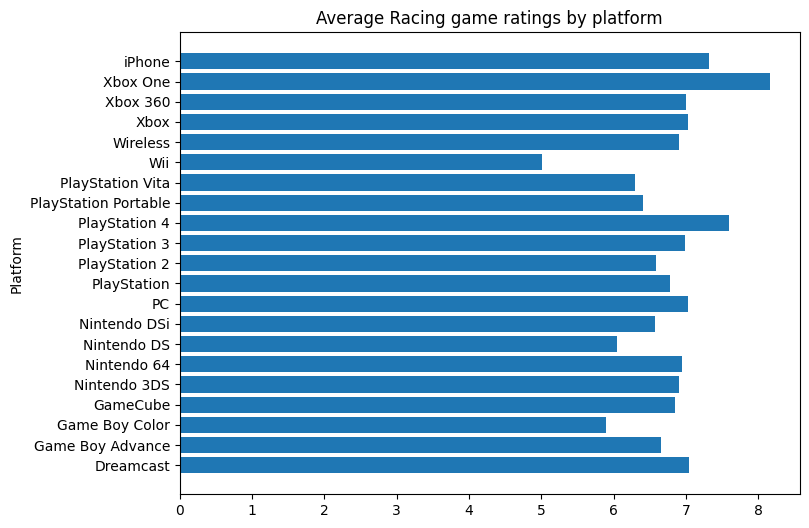

In [37]:
plt.figure(figsize=(8, 6))

plt.barh(ign_data.index, ign_data["Racing"])
plt.ylabel("Platform")
plt.title("Average Racing game ratings by platform")

What is going on here?

We're using the matplotlib to visualize our data.  We can also use pandas and another library called seaborn, but both are built on matplotlib.

There are two styles of using matplotlib.  One is the OO approach, where we create figures and axes (plots) directly, or the pyplot (stateful/globals) approach where we let the library create axes automatically.

In the above example, we used the pyplot approach.  To use the OO approach we could do the following:

Text(0.5, 1.0, 'Average Racing game ratings by platform')

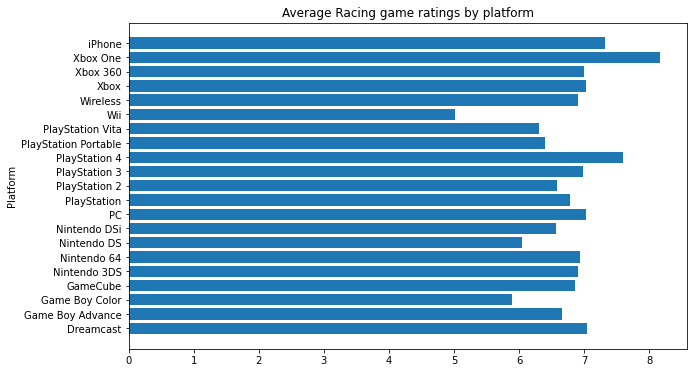

In [50]:
f = plt.figure(figsize=(10,6))
ax = f.add_subplot()

ax.barh(ign_data.index, ign_data["Racing"])
ax.set_ylabel("Platform")
ax.set_title("Average Racing game ratings by platform")

A good tutorial on it is at https://matplotlib.org/stable/tutorials/introductory/usage.html

The documentation for matplotlib is at https://matplotlib.org/stable/index.html

We'll get into matplotlib even more later in the course.

## Seaborn visualizations

We can also use the **seaborn** library which extends matplotlib to create a fancier looking barchart.  Seaborn includes more visualizations, has some built in statistics and look nicer out of the box.

Text(0.5, 1.0, 'Average Score for Racing Games, by Platform')

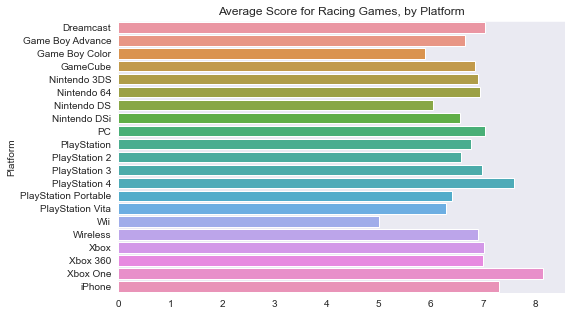

In [51]:
# Set the width and height of the figure in inches (8 wide, 6 high)
plt.figure(figsize=(8, 5))
# nice gray background
sns.set_style("dark")
# Bar chart showing average score for racing games by platform
sns.barplot(x=ign_data["Racing"], y=ign_data.index)
# remove the x label since we already know this is Racing
plt.xlabel("")
# Add label for vertical axis
plt.title("Average Score for Racing Games, by Platform")

Documentation for seaborn can be found at https://seaborn.pydata.org/index.html

Information on the barplot is https://seaborn.pydata.org/generated/seaborn.barplot.html
The example datasets for the documentation are at https://github.com/mwaskom/seaborn-data


Would you expect a racing game on the Wii platform to do well?  If not, which platform is the best bet for racing games?

# Visualizing all Combinations

Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game! Since your gaming interests are pretty broad (... you generally love most video games), you decide to use the IGN data to inform your new choice of genre and platform.

Let's use the data to create a *heatmap* of the average ratings by genre and platform.

Text(0.5, 1.0, 'Average Game Score, by Platform and Genre')

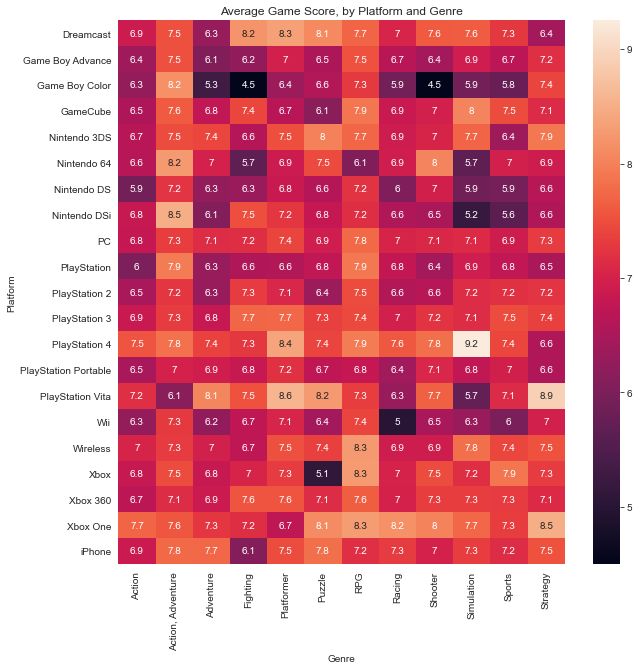

In [52]:
# Set the width and height of the figure
plt.figure(figsize=(10,10))
# Heatmap showing average game score by platform and genre
sns.heatmap(ign_data, annot=True)
# Add label for horizontal axis
plt.xlabel("Genre")
# Add label for vertical axis
plt.title("Average Game Score, by Platform and Genre")

Cool!  This makes it much easier to see the data.  Which combination of genre and platform receives the highest average ratings? Which combination receives the lowest average rankings?

For more information and options for the heatmap visualization, see the documentation https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Data Aggregation

Lets use some simple aggregation functions to understand the different platforms and genres a bit better.

First, lets see what genres have the best ratings overall.

In [53]:
ign_data.mean().sort_values(ascending=False)

RPG                  7.539589
Action, Adventure    7.505402
Platformer           7.304406
Strategy             7.215837
Puzzle               7.044883
Shooter              7.010270
Simulation           6.983722
Sports               6.909593
Fighting             6.864066
Adventure            6.762933
Racing               6.760007
Action               6.707490
dtype: float64

Notice how we easily calculated the average for each column?  We then took this series and sorted it by value in decending order.

Looks like people rate RPG games higher more consistently.

Next lets look at the average rating by platform

In [54]:
ign_data.mean(axis=1).sort_values()

Platform
Game Boy Color          6.163101
Nintendo DS             6.487522
Wii                     6.514726
Nintendo DSi            6.717961
Game Boy Advance        6.759118
PlayStation             6.785652
PlayStation Portable    6.809053
Nintendo 64             6.875570
PlayStation 2           6.920915
GameCube                7.122329
Xbox                    7.143010
PC                      7.164533
Xbox 360                7.225540
iPhone                  7.271501
Nintendo 3DS            7.277177
PlayStation 3           7.282974
Wireless                7.313729
PlayStation Vita        7.396840
Dreamcast               7.416497
PlayStation 4           7.702490
Xbox One                7.714107
dtype: float64

Here we set the axis to 1 meaning do the calculation across the rows instead of the columns.  Looks like games on Xbox One get the highest ratings.

Lets add the mean and standard devation to the original `DataFrame` and sort the `DataFrame` by average (mean). With the barplot we can also add error bars to show the standard deviation. Standard deviation is a measure of the amount of deviation of a data set from the mean.

In [55]:
ign_data['mean'] = ign_data.mean(axis=1)
ign_data = ign_data.sort_values("mean")
ign_data['std'] = ign_data.std(axis=1)
ign_data[['mean','std']]

,mean,std
Platform,,
Game Boy Color,6.163101,1.063451
Nintendo DS,6.487522,0.482980
Wii,6.514726,0.626290
Nintendo DSi,6.717961,0.829125
Game Boy Advance,6.759118,0.457511
PlayStation,6.785652,0.557233
PlayStation Portable,6.809053,0.232902
Nintendo 64,6.875570,0.775914
PlayStation 2,6.920915,0.397826


<AxesSubplot:xlabel='mean', ylabel='Platform'>

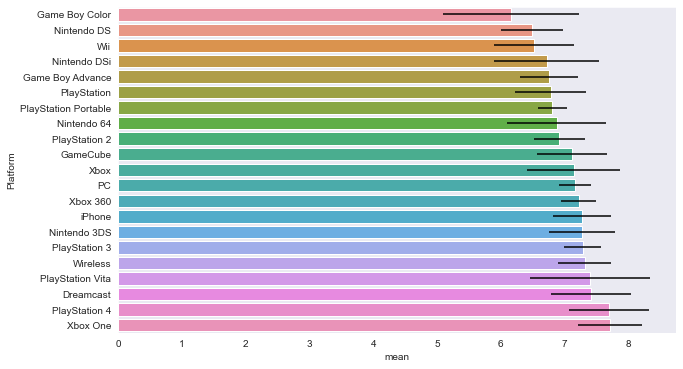

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=ign_data, y=ign_data.index, x="mean", xerr=ign_data["std"])

Overall, the X-Box One has the highest rated games.  The standard deviation for the PSP is the lowest across genres.

# What Next?

It is possible to get the individual ratings of video games [here](https://www.kaggle.com/adakibet/igns-game-reviews) and [here](https://www.dropbox.com/s/09sh15zbtwg9eu3/gamedata.xlsx)

What other questions are you interested in about video games?  What can you answer with this data or additional data available?

